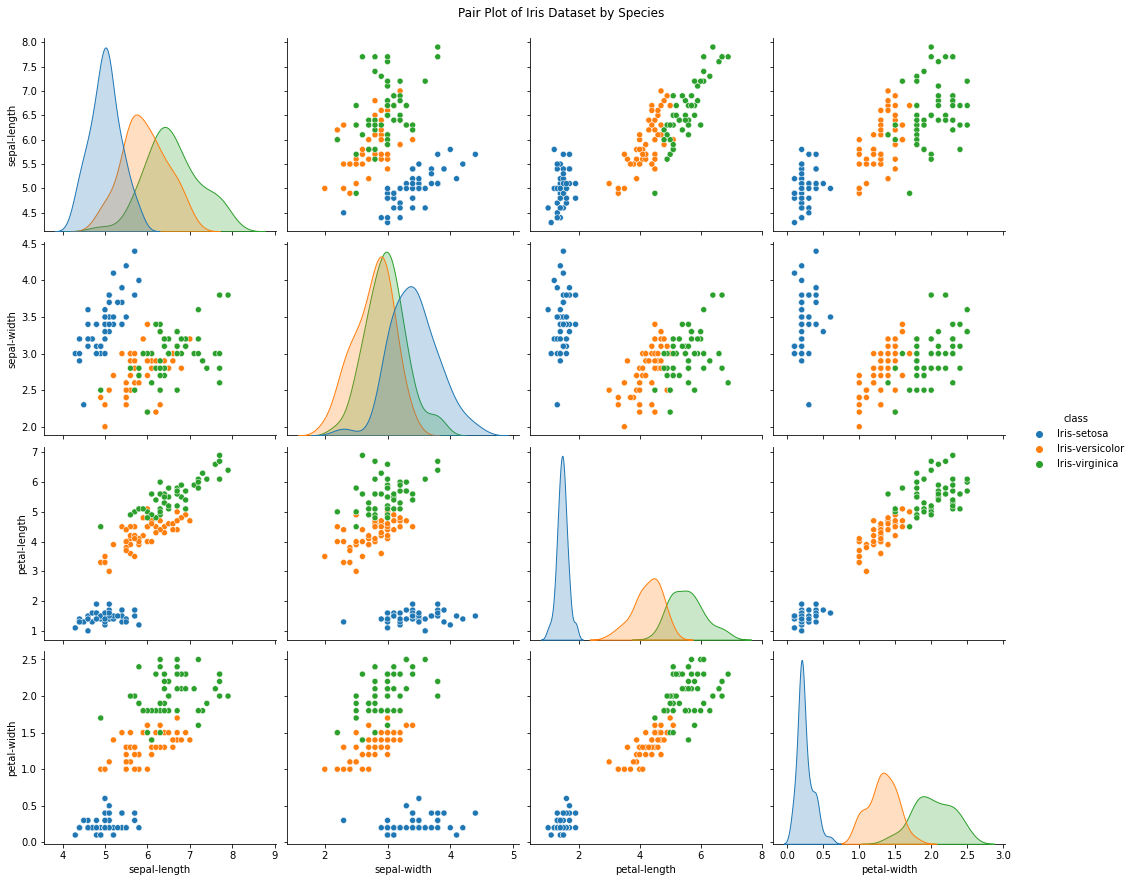

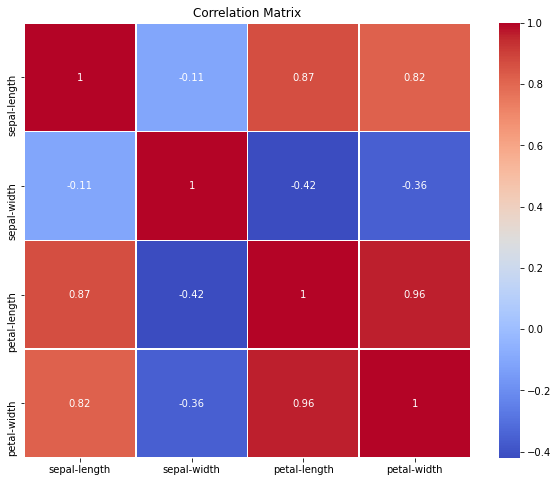

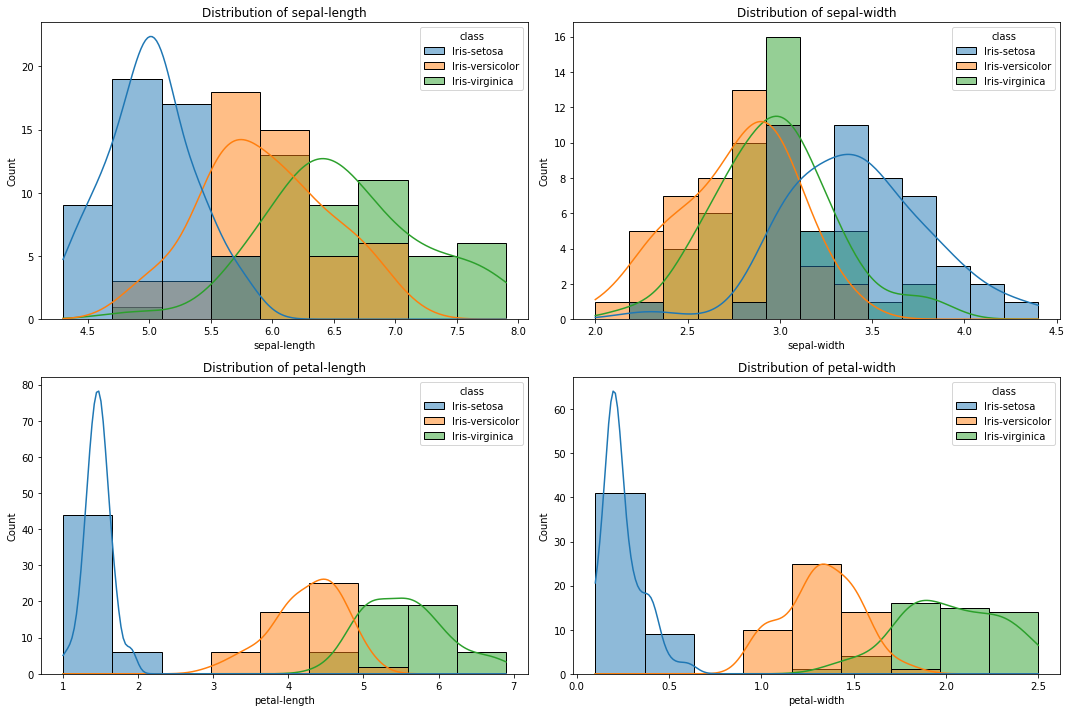

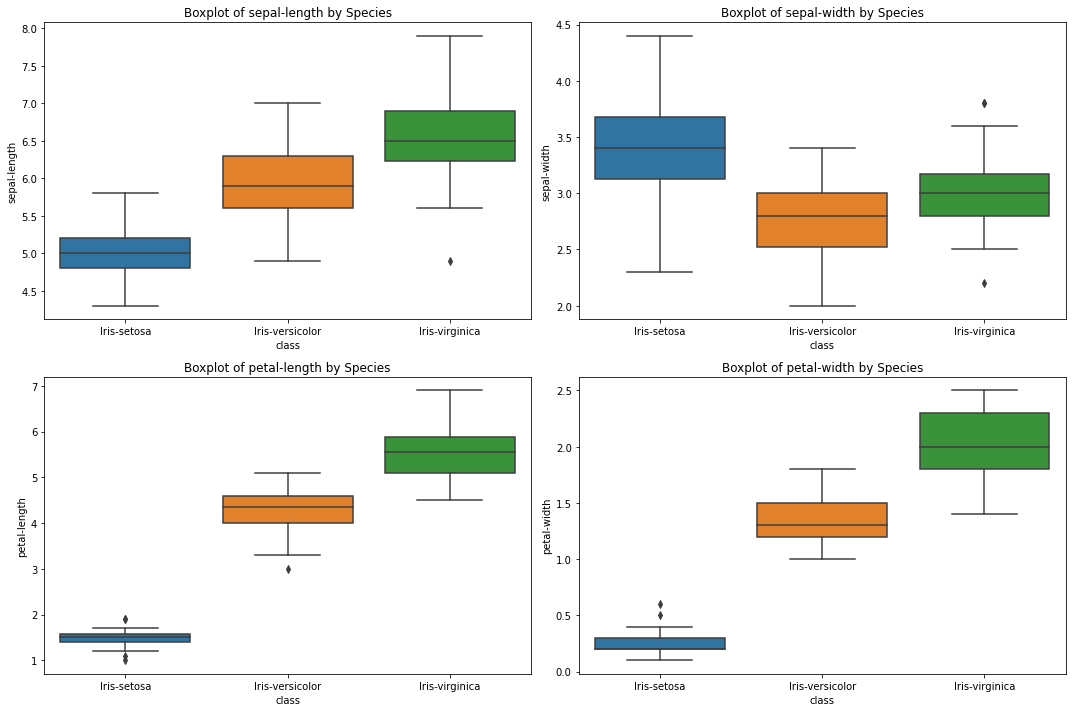

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for KNeighborsClassifier: {'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'distance'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVC: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for DecisionTreeClassifier: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Model: KNeighborsClassifier
Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versic

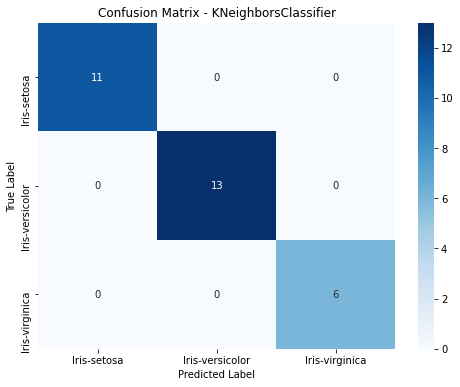


Model: SVC
Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



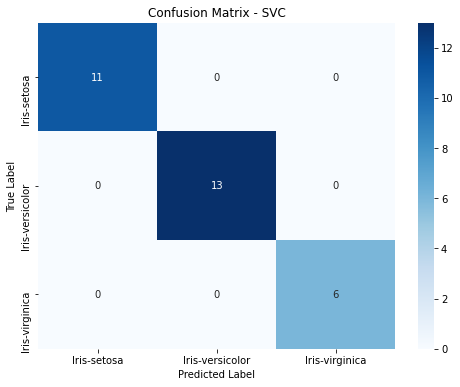


Model: DecisionTreeClassifier
Accuracy: 96.67%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



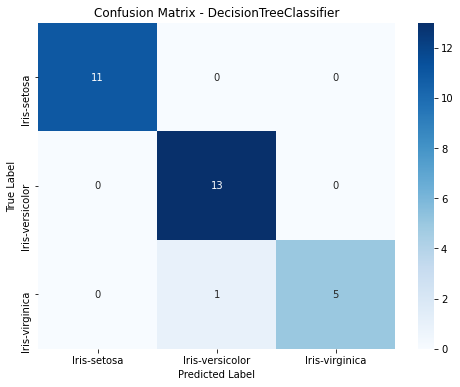


Model: RandomForestClassifier
Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



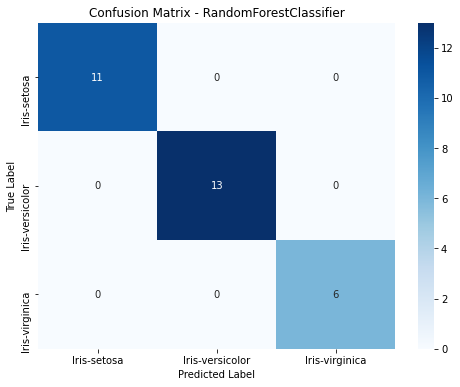

Best model saved to iris_classification_model.joblib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

# Load the dataset from your local CSV file
file_path = "IRIS.csv"  # Replace with your file path
dataset = pd.read_csv(file_path, skiprows=1, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

# Visualize the distribution of Iris flowers by species
sns.pairplot(dataset, hue='class', height=3, aspect=1.2)
plt.suptitle('Pair Plot of Iris Dataset by Species', y=1.02)
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
for i, ax in enumerate(axes.flat):
    sns.histplot(data=dataset, x=features[i], hue='class', kde=True, ax=ax)
    ax.set_title(f'Distribution of {features[i]}')

plt.tight_layout()
plt.show()

# Box plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    sns.boxplot(x='class', y=features[i], data=dataset, ax=ax)
    ax.set_title(f'Boxplot of {features[i]} by Species')

plt.tight_layout()
plt.show()

# Separate features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grids for GridSearchCV for different classifiers
param_grid_knn = {
    'classifier__n_neighbors': range(1, 21),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# List of models and parameter grids
models_param_grids = [
    (KNeighborsClassifier(), param_grid_knn),
    (SVC(), param_grid_svc),
    (DecisionTreeClassifier(), param_grid_dt),
    (RandomForestClassifier(), param_grid_rf)
]

# Iterate over each model and perform GridSearchCV
best_estimators = []
for model, param_grid in models_param_grids:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators.append(grid_search.best_estimator_)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")

# Evaluate each best model
for estimator in best_estimators:
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {estimator.named_steps['classifier'].__class__.__name__}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=estimator.named_steps['classifier'].classes_,
                yticklabels=estimator.named_steps['classifier'].classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {estimator.named_steps["classifier"].__class__.__name__}')
    plt.show()

# Save the best model (assuming RandomForestClassifier is the best for demonstration)
best_model = best_estimators[-1]  # Replace with the actual best model if different
model_filename = 'iris_classification_model.joblib'
dump(best_model, model_filename)
print(f"Best model saved to {model_filename}")
